# 코딩 패턴

1. 데이터셋을 불러오기 (loading)
1. 데이터셋 전처리 작업
1. tf.data.Dataset을 구성 (train, validation, test dataset)
1. 모델을 구성
1. 모델 컴파일 - optimizer, loss function, metrics 설정
1. 모델 학습(training)
1. 최종 평가

In [1]:
# import 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [3]:
def plot_result(hist, loss_min=None, loss_max=None):
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(hist.epoch, hist.history['loss'], label="train")
    plt.plot(hist.epoch, hist.history['val_loss'], label='validation')
    plt.title('Loss')
    if loss_min!=None and loss_max!=None:
        plt.ylim(loss_min, loss_max)
        
    plt.xlabel('에폭수')
    plt.ylabel('loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(hist.epoch, hist.history['accuracy'], label='train')
    plt.plot(hist.epoch, hist.history['val_accuracy'], label='validation')
    plt.title('Accuracy')
    plt.xlabel('에폭수')
    plt.ylabel('accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [4]:
# MNIST 데이터셋 로딩
(train_image, train_label), (test_image, test_label)  = keras.datasets.mnist.load_data()

# 전처리 - X: scaling, y: one hot encoding 처리
y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

X_train = train_image.astype('float32')/255
X_test = test_image.astype('float32')/255

print(y_train.shape, y_test.shape)
print(X_train.dtype, X_test.dtype)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 10) (10000, 10)
float32 float32


In [6]:
# 하이퍼파리미터
LEARNING_RATE = 0.001
N_EPOCH = 20
N_BATCH = 1000

In [7]:
# Dataset 생성
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .shuffle(60000).batch(N_BATCH, drop_remainder=True)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCH)

print(len(train_dataset), len(test_dataset))

60 10


# 모델의 크기 변경 -> 성능 확인

In [8]:
def get_small_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28))) # Input Layer + flatten layer
    model.add(layers.Dense(10, activation='softmax', name='output_layer')) # output layer
    
    model.compile(optimizer=optimizers.Adam(learning_rate=LEARNING_RATE), 
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model    

In [9]:
small_model = get_small_model()
small_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 output_layer (Dense)        (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [10]:
hist = small_model.fit(train_dataset, epochs=N_EPOCH, validation_data=test_dataset)

Epoch 1/20
60/60 [==============================] - 1s 9ms/step - loss: 1.4352 - accuracy: 0.6423 - val_loss: 0.8693 - val_accuracy: 0.8311
Epoch 2/20
60/60 [==============================] - 0s 7ms/step - loss: 0.7308 - accuracy: 0.8426 - val_loss: 0.5948 - val_accuracy: 0.8693
Epoch 3/20
60/60 [==============================] - 0s 6ms/step - loss: 0.5609 - accuracy: 0.8684 - val_loss: 0.4907 - val_accuracy: 0.8869
Epoch 4/20
60/60 [==============================] - 1s 7ms/step - loss: 0.4829 - accuracy: 0.8806 - val_loss: 0.4349 - val_accuracy: 0.8930
Epoch 5/20
60/60 [==============================] - 0s 7ms/step - loss: 0.4369 - accuracy: 0.8892 - val_loss: 0.3995 - val_accuracy: 0.8996
Epoch 6/20
60/60 [==============================] - 1s 7ms/step - loss: 0.4061 - accuracy: 0.8949 - val_loss: 0.3752 - val_accuracy: 0.9050
Epoch 7/20
60/60 [==============================] - 1s 7ms/step - loss: 0.3837 - accuracy: 0.8996 - val_loss: 0.3574 - val_accuracy: 0.9068
Epoch 8/20
60/60 [==

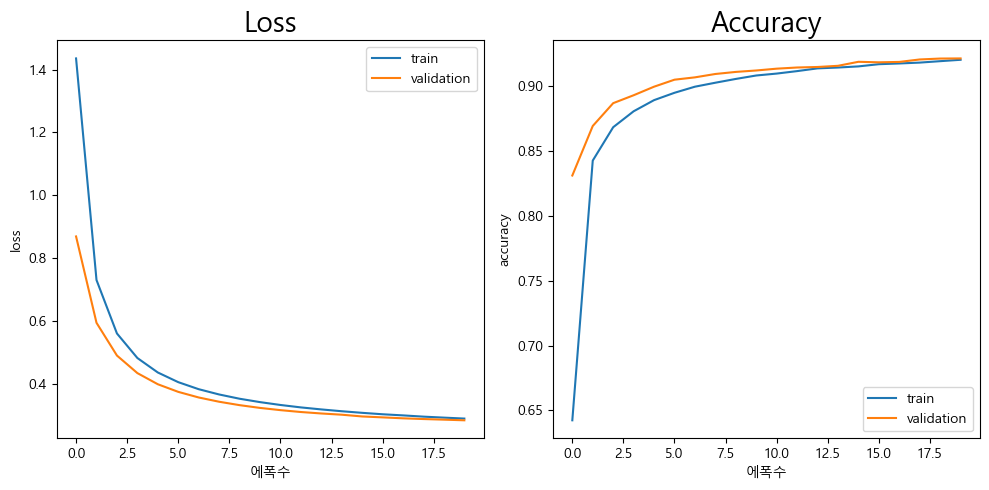

In [15]:
# 시각화
plot_result(hist)#, 0.25, 0.5)

In [16]:
def get_big_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28))) # Input Layer + flatten layer
    # hidden layer 추가
    model.add(layers.Dense(512, activation='relu'))
    
    
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    
    model.add(layers.Dense(10, activation='softmax', name='output_layer')) # output layer
    
    model.compile(optimizer=optimizers.Adam(learning_rate=LEARNING_RATE), 
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model    

In [17]:
big_model = get_big_model()
big_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 128)              

In [18]:
hist = big_model.fit(train_dataset, epochs=N_EPOCH, validation_data=test_dataset)

Epoch 1/20
60/60 [==============================] - 4s 48ms/step - loss: 0.6680 - accuracy: 0.7776 - val_loss: 0.2042 - val_accuracy: 0.9387
Epoch 2/20
60/60 [==============================] - 3s 44ms/step - loss: 0.1531 - accuracy: 0.9547 - val_loss: 0.1296 - val_accuracy: 0.9606
Epoch 3/20
60/60 [==============================] - 3s 45ms/step - loss: 0.0958 - accuracy: 0.9714 - val_loss: 0.0907 - val_accuracy: 0.9725
Epoch 4/20
60/60 [==============================] - 4s 66ms/step - loss: 0.0650 - accuracy: 0.9805 - val_loss: 0.0837 - val_accuracy: 0.9742
Epoch 5/20
60/60 [==============================] - 4s 63ms/step - loss: 0.0484 - accuracy: 0.9855 - val_loss: 0.0788 - val_accuracy: 0.9753
Epoch 6/20
60/60 [==============================] - 5s 80ms/step - loss: 0.0363 - accuracy: 0.9891 - val_loss: 0.0668 - val_accuracy: 0.9798
Epoch 7/20
60/60 [==============================] - 5s 76ms/step - loss: 0.0307 - accuracy: 0.9900 - val_loss: 0.0717 - val_accuracy: 0.9767
Epoch 8/20
60

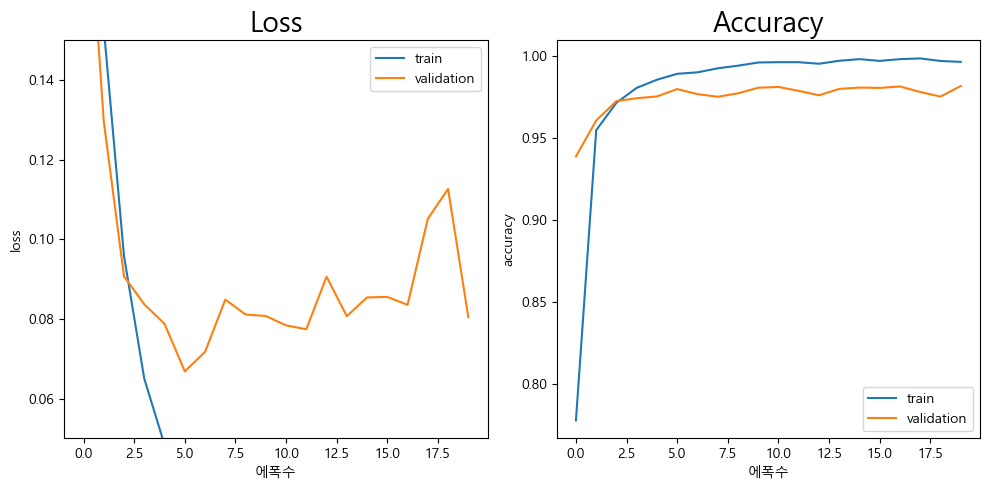

In [20]:
plot_result(hist, 0.05, 0.15)

In [21]:
print(small_model.evaluate(test_dataset))
print(big_model.evaluate(test_dataset))

10/10 [==============================] - 0s 5ms/step - loss: 0.2848 - accuracy: 0.9214
[0.2848351001739502, 0.9214000105857849]
10/10 [==============================] - 0s 22ms/step - loss: 0.0805 - accuracy: 0.9817
[0.08046633750200272, 0.9817000031471252]


# Dropout Layer

In [24]:
# Dropout Layer는 Dropout을 설정하려는 Layer 앞에 먼저 정의한다.
def get_dropout_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28))) # Input Layer + flatten layer
    # hidden layer 추가
    
#     rate = 0.5
    
    model.add(layers.Dropout(rate=0.5))   #drop out 노드의 비율을 지정.
    model.add(layers.Dense(512, activation='relu'))
    
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation='relu'))
    
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation='relu'))
    
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax', name='output_layer')) # output layer
    
    model.compile(optimizer=optimizers.Adam(learning_rate=LEARNING_RATE), 
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model    

In [29]:
dropout_model = get_dropout_model()
dropout_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dropout_18 (Dropout)        (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 512)               401920    
                                                                 
 dropout_19 (Dropout)        (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 512)               262656    
                                                                 
 dropout_20 (Dropout)        (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 256)              

In [26]:
hist = dropout_model.fit(train_dataset, epochs=N_EPOCH, validation_data=test_dataset)

Epoch 1/20
60/60 [==============================] - 6s 75ms/step - loss: 2.3144 - accuracy: 0.1204 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 2/20
60/60 [==============================] - 4s 72ms/step - loss: 2.2229 - accuracy: 0.1834 - val_loss: 2.1214 - val_accuracy: 0.2230
Epoch 3/20
60/60 [==============================] - 4s 73ms/step - loss: 2.0329 - accuracy: 0.2290 - val_loss: 2.0265 - val_accuracy: 0.2654
Epoch 4/20
60/60 [==============================] - 4s 71ms/step - loss: 1.8768 - accuracy: 0.2687 - val_loss: 1.7526 - val_accuracy: 0.3143
Epoch 5/20
60/60 [==============================] - 6s 93ms/step - loss: 1.6984 - accuracy: 0.3421 - val_loss: 1.7106 - val_accuracy: 0.3331
Epoch 6/20
60/60 [==============================] - 6s 101ms/step - loss: 1.5494 - accuracy: 0.3853 - val_loss: 1.4455 - val_accuracy: 0.4188
Epoch 7/20
60/60 [==============================] - 6s 90ms/step - loss: 1.3915 - accuracy: 0.4355 - val_loss: 1.2295 - val_accuracy: 0.5053
Epoch 8/20
6

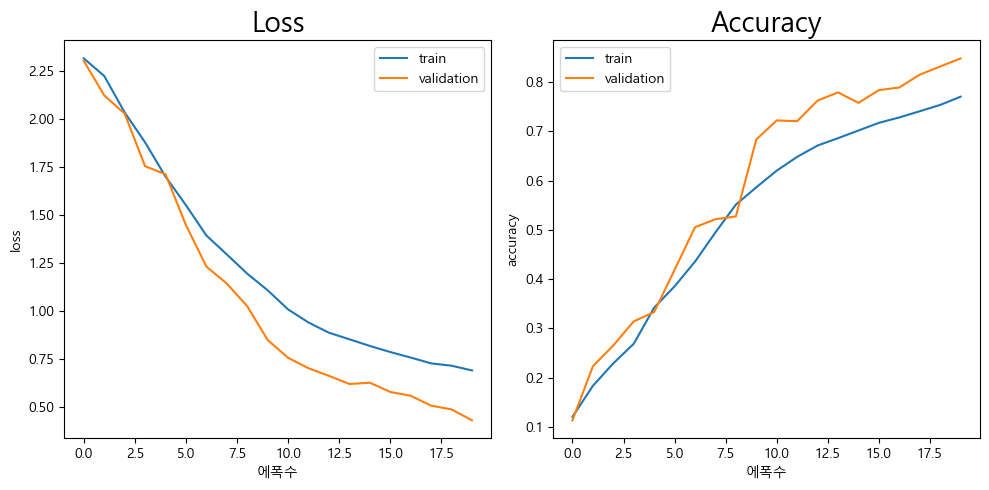

In [27]:
plot_result(hist)